# Heart Disease Prediction

## Table of Content

## 1- Introduction



## 2- Importing Libraries

In [1]:
# load libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import time
import pandas as pd
import pandas

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier       
from sklearn.ensemble import RandomForestClassifier    
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

## 3- Explaining Features and Target

The data is originally from CDC and it is publicly available on Kaggle. It was collected from interviewing around 400k people and asking them questions related to their general health.

**Features:**

* BMI: Numerical field. Body Mass Index (BMI).

* Smoking: Yes/No field. Have you smoked at least 100 cigarettes in your entire life?

* AlcoholDrinking: Yes/No field. Adult men are considered heavy drinkers when having more than 14 drinks per week, and adult women when having more than 7 drinks per week.

* Stroke: Yes/No field. (Ever told) (you had) a stroke?

* PhysicalHealth: Numerical field. For how many days during the past 30 days was your physical health not good? (0-30 days).

* MentalHealth: Numerical field. For how many days during the past 30 days was your mental health not good? (0-30 days).

* DiffWalking: Yes/No field. Do you have serious difficulty walking or climbing stairs?

* Sex: Are you male or female?

* AgeCategory: Categorical field. Fourteen-level age category.

* Race: Categorical field. Imputed race/ethnicity value.

* Diabetic: Yes/No field. (Ever told) (you had) diabetes?

* PhysicalActivity: Yes/No field. Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

* GenHealth: Categorcial field with five values that adults used to rate their health in general (poor, fair, good, very good, excellent).

* SleepTime: Numerical field. On average, how many hours of sleep do you get in a 24-hour period?

* Asthma: Yes/No field. (Ever told) (you had) asthma?

* KidneyDisease: Yes/No field. Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

* SkinCancer:  Yes/No field. (Ever told) (you had) skin cancer?

**Target:**

* HeartDisease (target): Yes/No field. Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). 

## 4- Loading the Data

In [2]:
heart = pd.read_csv('heart_2020_cleaned.csv')
##heart.rename(columns = {'Unnamed: 0':'Patient ID'}, inplace = True)
heart.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
heart2 = pd.read_csv('heart_2020_cleaned.csv')

## 5- EDA

In [4]:
#dimensions

heart.shape

(319795, 18)

In [5]:
#statistical summary of the numerical fields

heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
heart.info

<bound method DataFrame.info of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  A

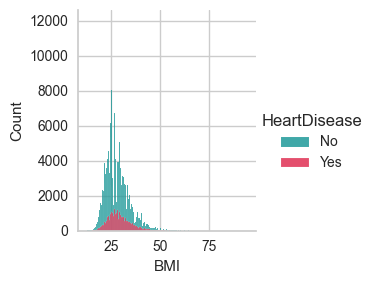

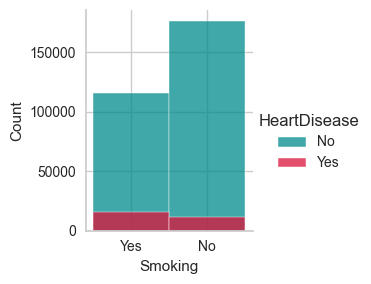

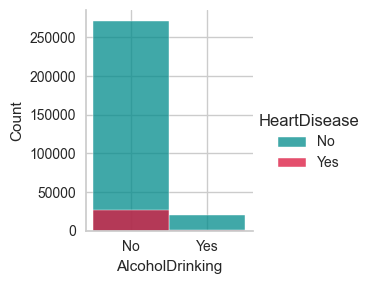

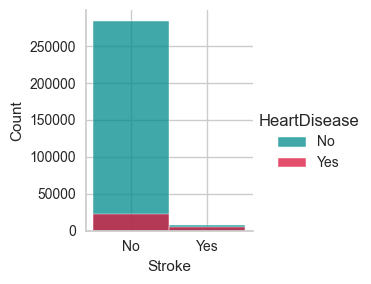

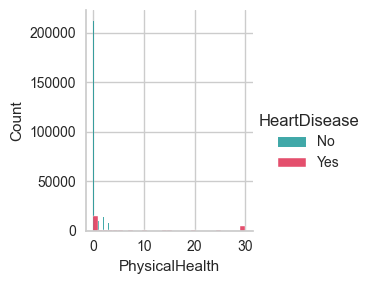

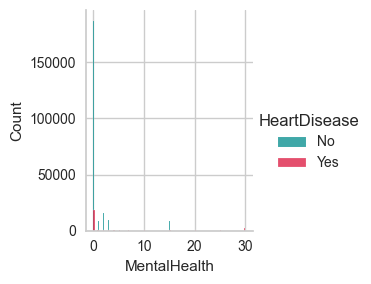

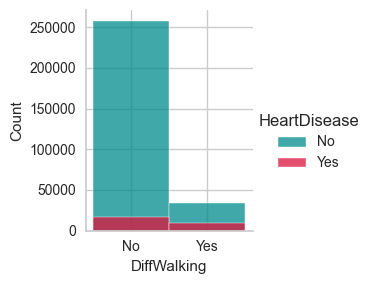

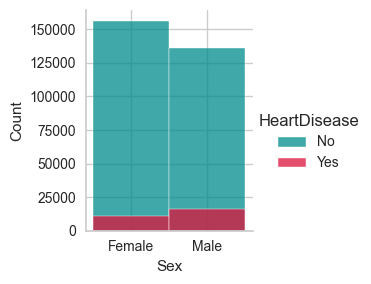

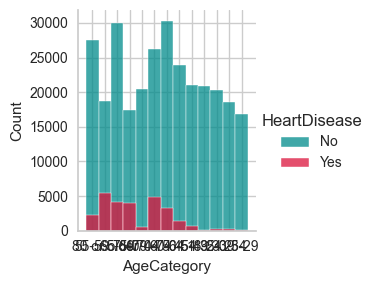

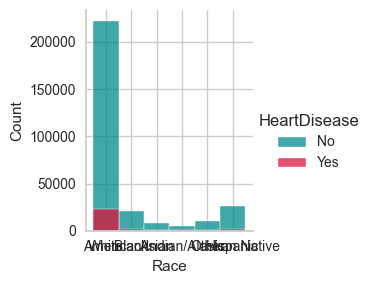

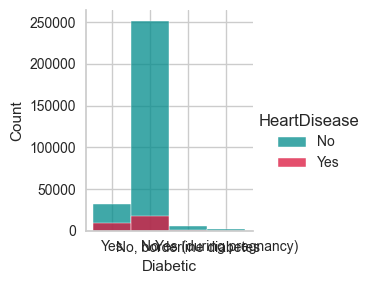

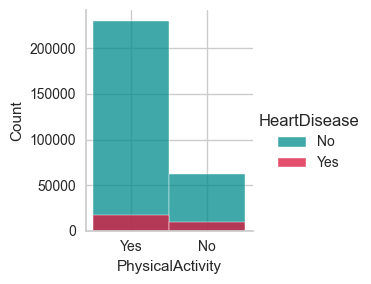

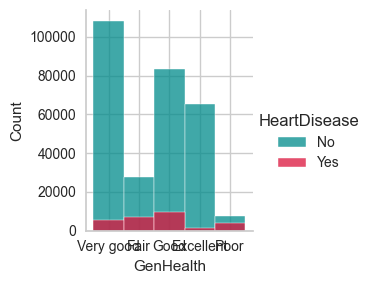

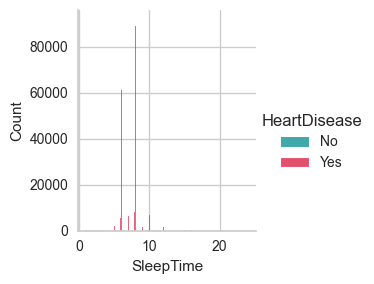

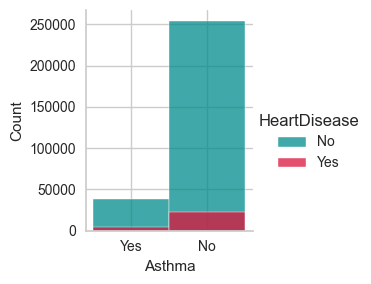

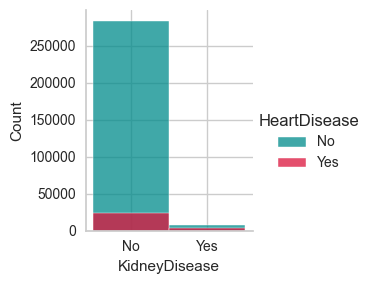

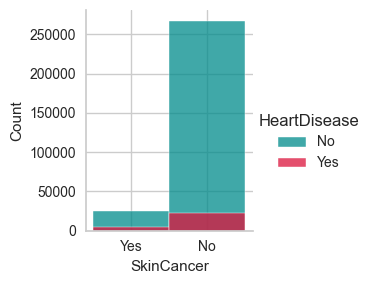

In [7]:
for i in heart.columns:
    if i == 'HeartDisease':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(heart,hue='HeartDisease',palette=['#008B8B','crimson'])\
    .map(sns.histplot,i)\
    .add_legend()
    plt.show()

<AxesSubplot: xlabel='HeartDisease', ylabel='BMI'>

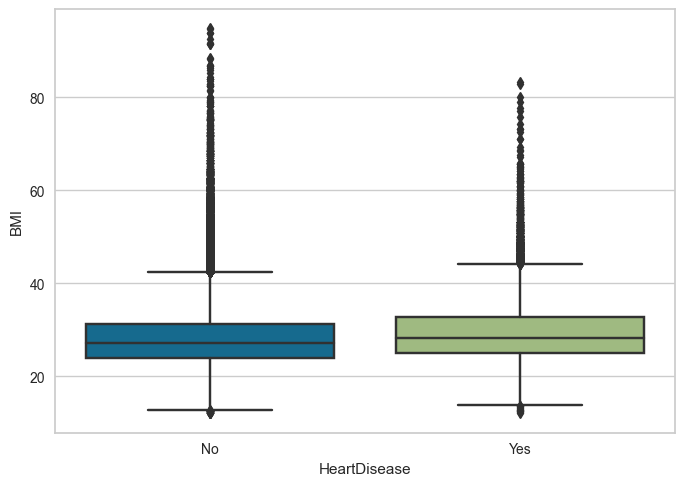

In [8]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'HeartDisease', y = 'BMI', data = heart)

<AxesSubplot: xlabel='HeartDisease', ylabel='PhysicalHealth'>

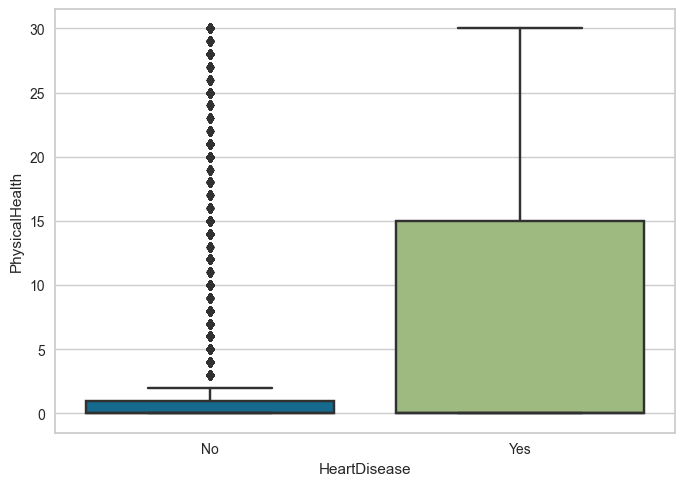

In [9]:
sns.boxplot(x = 'HeartDisease', y = 'PhysicalHealth', data = heart)

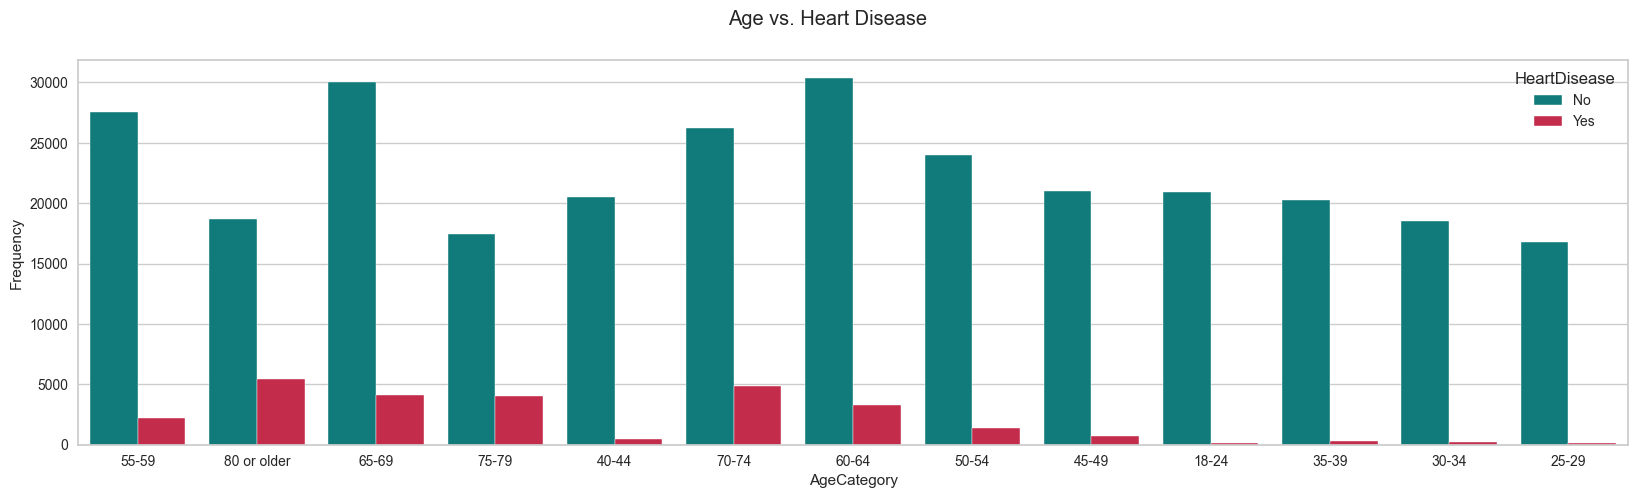

In [10]:
plt.figure(figsize = (20,5))
sns.countplot(x = heart['AgeCategory'], hue = 'HeartDisease', data = heart, palette=['#008B8B','crimson'])
plt.suptitle("Age vs. Heart Disease")
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot: >

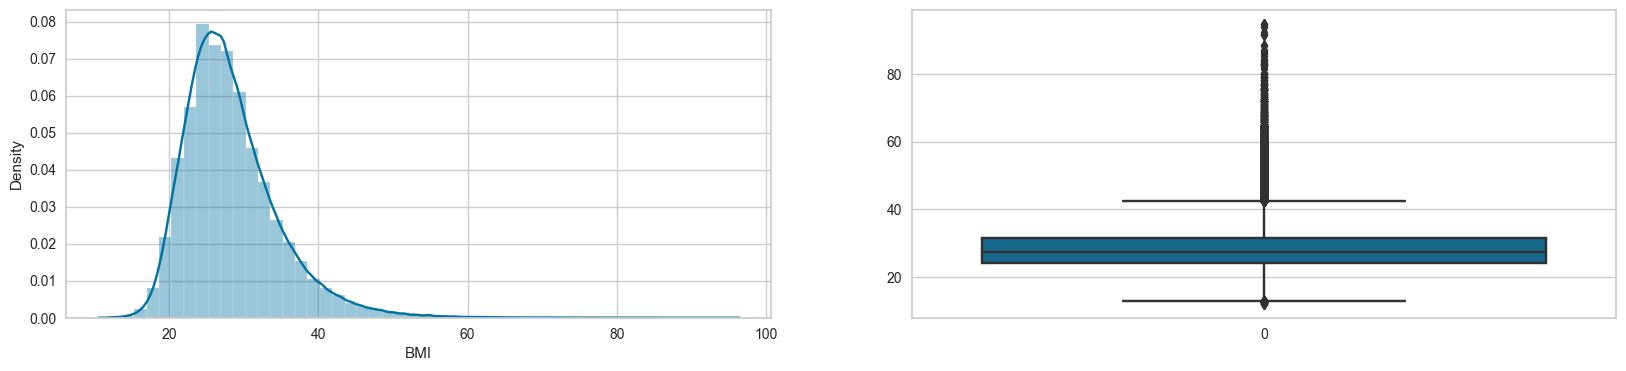

In [11]:
#Univariate analysis of BMI.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(heart['BMI'])
f.add_subplot(1,2,2)
sns.boxplot(heart['BMI'])

<AxesSubplot: >

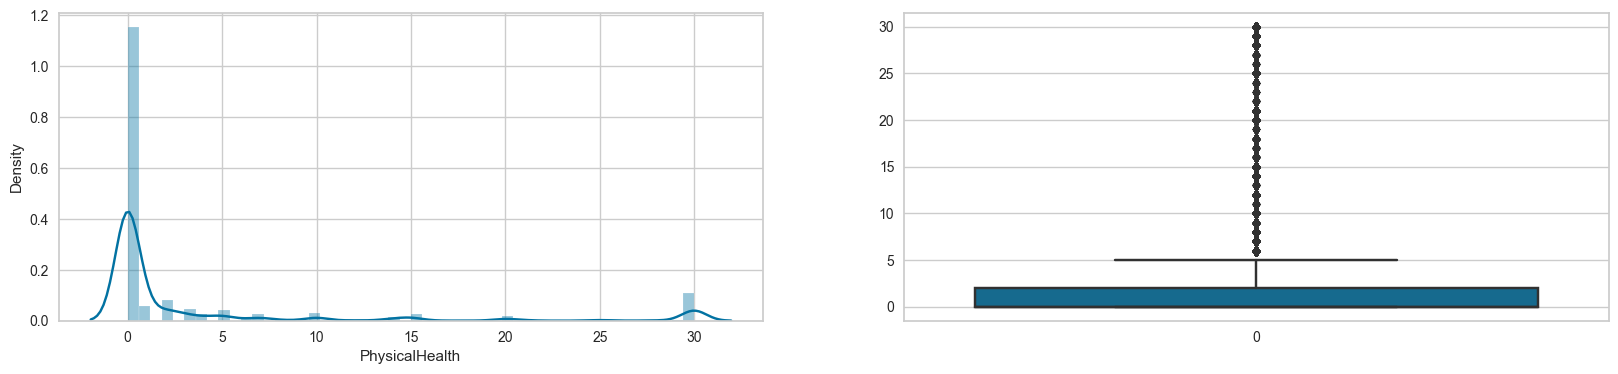

In [279]:
#Univariate analysis of PhysicalHealth.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(heart['PhysicalHealth'])
f.add_subplot(1,2,2)
sns.boxplot(heart['PhysicalHealth'])

<AxesSubplot: >

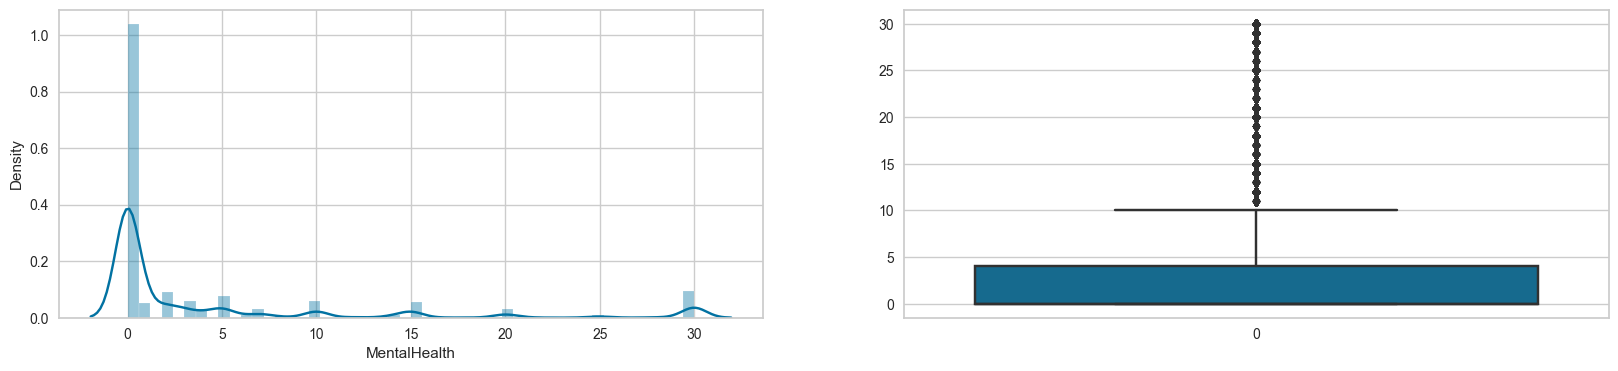

In [282]:
#Univariate analysis of MentalHealth.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(heart['MentalHealth'])
f.add_subplot(1,2,2)
sns.boxplot(heart['MentalHealth'])

<AxesSubplot: >

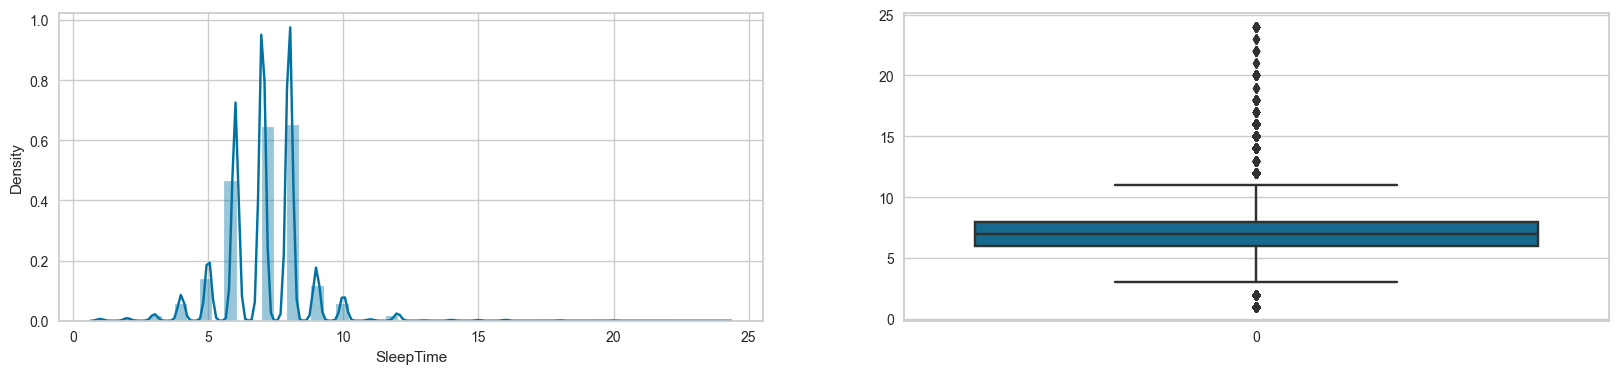

In [283]:
#Univariate analysis of SleepTime.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(heart['SleepTime'])
f.add_subplot(1,2,2)
sns.boxplot(heart['SleepTime'])

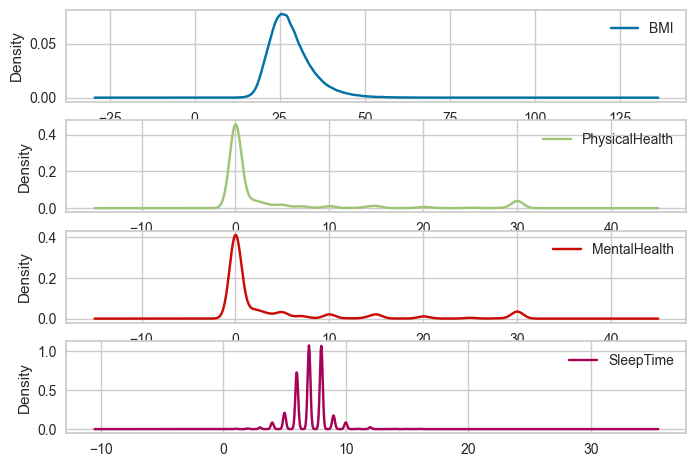

In [12]:
heart.plot(kind='density', subplots=True, sharex=False)
plt.show()

## 6- Null Values

In [13]:
heart[heart.isnull().any(axis=1)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


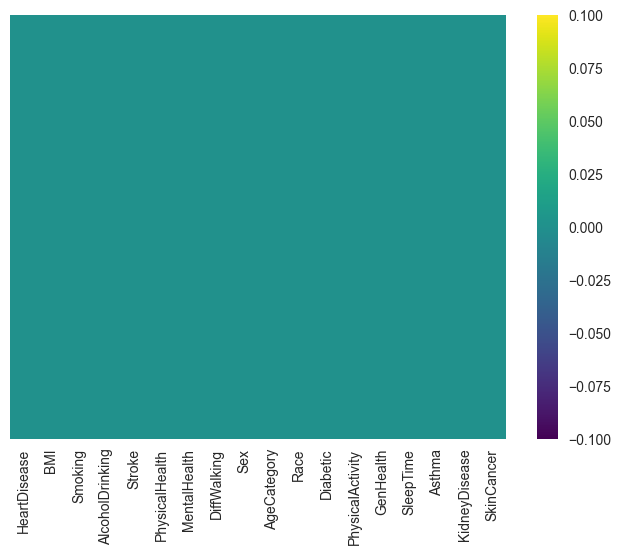

In [14]:
sns.heatmap(heart.isnull(), cmap = 'viridis')
plt.yticks([])

plt.show()

## 7- Duplicated Records

In [15]:
duplicate = heart.duplicated()
print(duplicate.sum())

18078


In [16]:
heart = heart.drop_duplicates(keep='first')

In [17]:
heart.shape

(301717, 18)

## 8- Data Types and Encoding

In [18]:
heart.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

From the above output, we can see that BMI, PhysicalHealth, MentalHealth, and SleepTime are numerical fields. All other fields are categorical. And it is necessary to convert/encode their values into numerical ones before fitting and evaluating the models to get accurate results.

There are 14 fields where the values are words that can be encoded to be represented in numbers. I will use Pandas to directly replace the text values to a numeric equivalent by using replace.

In [19]:
print(heart["HeartDisease"].value_counts())
print(heart["Smoking"].value_counts())
print(heart["AlcoholDrinking"].value_counts())
print(heart["Stroke"].value_counts())
print(heart["DiffWalking"].value_counts())
print(heart["Sex"].value_counts())
print(heart["AgeCategory"].value_counts())
print(heart["Race"].value_counts())
print(heart["Diabetic"].value_counts())
print(heart["PhysicalActivity"].value_counts())
print(heart["GenHealth"].value_counts())
print(heart["Asthma"].value_counts())
print(heart["KidneyDisease"].value_counts())
print(heart["SkinCancer"].value_counts())

No     274456
Yes     27261
Name: HeartDisease, dtype: int64
No     174312
Yes    127405
Name: Smoking, dtype: int64
No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64
No     289653
Yes     12064
Name: Stroke, dtype: int64
No     257362
Yes     44355
Name: DiffWalking, dtype: int64
Female    159671
Male      142046
Name: Sex, dtype: int64
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64
White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: Race, dtype: int64
No                         251796
Yes                         40589
No

* **HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, PhysicalActivity, Asthma, KidneyDisease, SkinCancer:**
   * Yes: 1
   * No : 0
* **Sex:**
   * Female: 1
   * Male : 0
* **AgeCategory:**
   * AgeCategory was encoded to the average of each category as following:
       - 18-24: 21
       - 25-29: 27
       - 30-34: 32
       - 35-39: 37
       - 40-44: 42
       - 45-49: 47
       - 50-54: 52
       - 55-59: 57
       - 60-64: 62
       - 65-69: 67
       - 65-69: 67
       - 70-74: 72
       - 75-79: 77
       - 80 or older: 80
* **Race:**
   * American Indian/Alaskan Native: 0
   * Asian: 1
   * Black: 2
   * Hispanic: 3
   * White: 4
   * Other: 5
* **Diabetic:**
   * No: 0
   * No, borderline diabetes: 1
   * Yes (during pregnancy): 3
   * Yes: 4
* **GenHealth:**
   * Poor: 0
   * Fair: 1
   * Good: 2
   * Very good: 3
   * Excellent: 4 

In [20]:
encoding = {
            "HeartDisease":    {"Yes"  : 1, "No": 0},
            "Smoking":         {"Yes"  : 1, "No": 0},
            "AlcoholDrinking": {"Yes"  : 1, "No": 0},
            "Stroke":          {"Yes"  : 1, "No": 0},
            "DiffWalking":     {"Yes"  : 1, "No": 0},
            "Sex":             {"Male" : 0, "Female": 1},
            "AgeCategory":     {"18-24": 21, "25-29": 27,
                                "30-34": 32, "35-39": 37,
                                "40-44": 42, "45-49": 47,
                                "50-54": 52, "55-59": 57,
                                "60-64": 62, "65-69": 67,
                                "65-69": 67, "70-74": 72,
                                "75-79": 77, "80 or older": 80},
            "Race":            {"American Indian/Alaskan Native": 0, "Asian": 1,
                                "Black": 2, "Hispanic": 3,
                                "White": 4, "Other": 5},
            "Diabetic":        {"No"   : 0, "No, borderline diabetes": 1,
                                "Yes"  : 4, "Yes (during pregnancy)": 3},   
            "PhysicalActivity":{"Yes"  : 1, "No": 0},   
            "GenHealth":       {"Poor" : 0, "Fair": 1,
                                "Good" : 2, "Very good": 3,
                                "Excellent": 4},   
            "Asthma":          {"Yes"  : 1, "No": 0},  
            "KidneyDisease":   {"Yes"  : 1, "No": 0}, 
            "SkinCancer":      {"Yes"  : 1, "No": 0},  
           }

heart = heart.replace(encoding)
heart.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,57,4,4,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80,4,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,67,4,4,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,77,4,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,42,4,0,1,3,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,1,77,2,0,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,1,72,4,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,1,80,4,4,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,1,80,4,1,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,0,67,4,0,1,2,10.0,0,0,0


In [21]:
heart.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

## 9- Feature Scaling

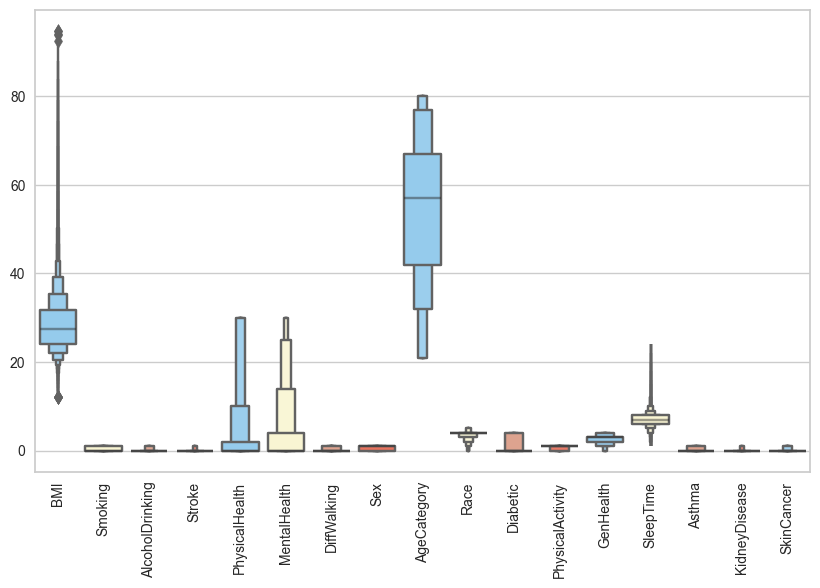

In [22]:
shades =["lightskyblue", "lemonchiffon", "darksalmon", "tomato"]
plt.figure(figsize=(10,6))
sns.boxenplot(data = heart.iloc[:,1:],palette = shades)
plt.xticks(rotation=90)
plt.show()

In [23]:
X = heart.drop(['HeartDisease'], axis=1)
Y = heart['HeartDisease']
print(X.shape)
print(Y.shape)

(301717, 17)
(301717,)


In [24]:
scaler = preprocessing.StandardScaler().fit(X)
scaled_features = scaler.transform(X)

#check whether the normalized features have a mean of zero and a standard deviation of one:
np.mean(scaled_features),np.std(scaled_features)

(1.2589538780083539e-17, 1.0)

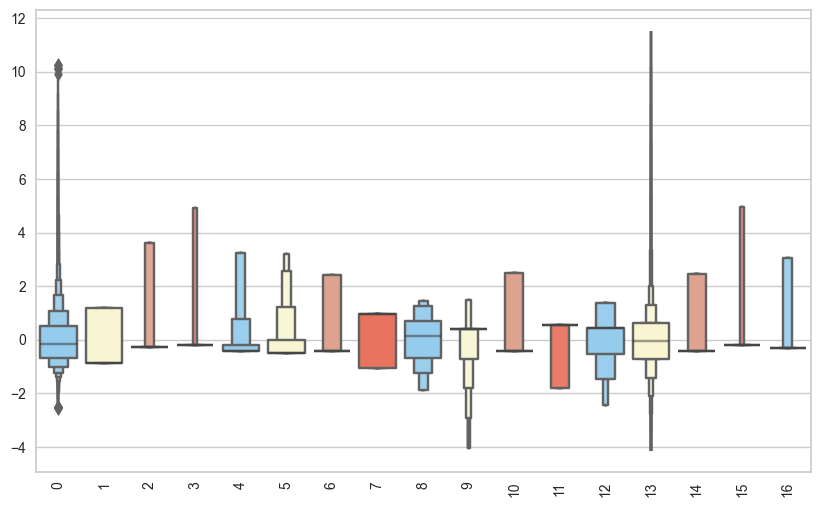

In [25]:
shades =["lightskyblue", "lemonchiffon", "darksalmon", "tomato"]
plt.figure(figsize=(10,6))
sns.boxenplot(data = scaled_features,palette = shades)
plt.xticks(rotation=90)
plt.show()

## 10- Target Distribution

In [26]:
Y.value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [295]:
fig = px.pie(Y)
fig.add_trace(go.Pie(labels=["No","Yes"],
                     values=[x for x in Y.value_counts()],
                     textinfo='label+percent', marker_colors=['#107ab0','crimson']))

fig.update_layout(title_text='HeartDisease', title_x=0.5)
fig.show()

In [28]:
#this code was not used but I kept it for future reference and further research
from sklearn.utils import resample

yes_downsample = resample(heart2[heart2['HeartDisease'] == 'Yes'],
             replace=True,
             n_samples=180000,
             random_state=0)

print(yes_downsample.shape)

no_downsample = resample(heart2[heart2['HeartDisease'] == 'No'],
             replace=True,
             n_samples=180000,
             random_state=0)

print(no_downsample.shape)

(180000, 18)
(180000, 18)


In [29]:
#Balancing the data

sampler = RandomOverSampler(random_state=0)

X_resampled, y_resampled = sampler.fit_resample(X, Y)
print(y_resampled.value_counts())

0    274456
1    274456
Name: HeartDisease, dtype: int64


In [296]:
fig = px.pie(y_resampled)
fig.add_trace(go.Pie(labels=["No","Yes"],
                     values=[x for x in y_resampled.value_counts()],
                     textinfo='label+percent', marker_colors=['#107ab0','crimson']))

fig.update_layout(title_text='HeartDisease', title_x=0.5)
fig.show()

## 11- Split Data into Train and Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0, stratify=y_resampled)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(384238, 17)
(164674, 17)
(384238,)
(164674,)


## 12 a- Feature Selection (Categorical)

In [31]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X_train_cat = X_train.loc[:,~X_train.columns.isin(['BMI','PhysicalHealth','MentalHealth',
                                           'SleepTime'])]
print(X_train_cat)

f_p_values = chi2(X_train_cat, y_train)

        Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  AgeCategory  Race  \
348969        1                0       0            0    1           77     4   
503798        0                0       0            0    0           80     4   
109483        0                0       0            0    1           27     4   
487597        0                0       0            0    0           72     4   
25459         1                0       0            1    0           72     4   
...         ...              ...     ...          ...  ...          ...   ...   
407996        0                0       0            0    0           72     4   
113791        1                0       0            0    0           67     4   
373842        1                0       0            1    0           67     4   
425409        1                0       0            0    0           77     4   
292008        0                0       0            0    1           57     4   

        Diabetic  PhysicalA

In [32]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_train_cat.columns
p_values
p_values.sort_values(ascending=True)

Smoking              0.000000e+00
AlcoholDrinking      0.000000e+00
Stroke               0.000000e+00
DiffWalking          0.000000e+00
Sex                  0.000000e+00
AgeCategory          0.000000e+00
Diabetic             0.000000e+00
PhysicalActivity     0.000000e+00
GenHealth            0.000000e+00
KidneyDisease        0.000000e+00
SkinCancer           0.000000e+00
Asthma              2.782917e-227
Race                 8.698642e-67
dtype: float64

Chi square tests the correlation between each feature and the target variable. The p value of the test for all variables is less than 0.05 (the significance level). Therefore, the null that states "each variable is not correlated witht target" is rejected. The target is depending on all features. And all features will be selected.

## 12 b- Feature Selection (Numerical)

<AxesSubplot: >

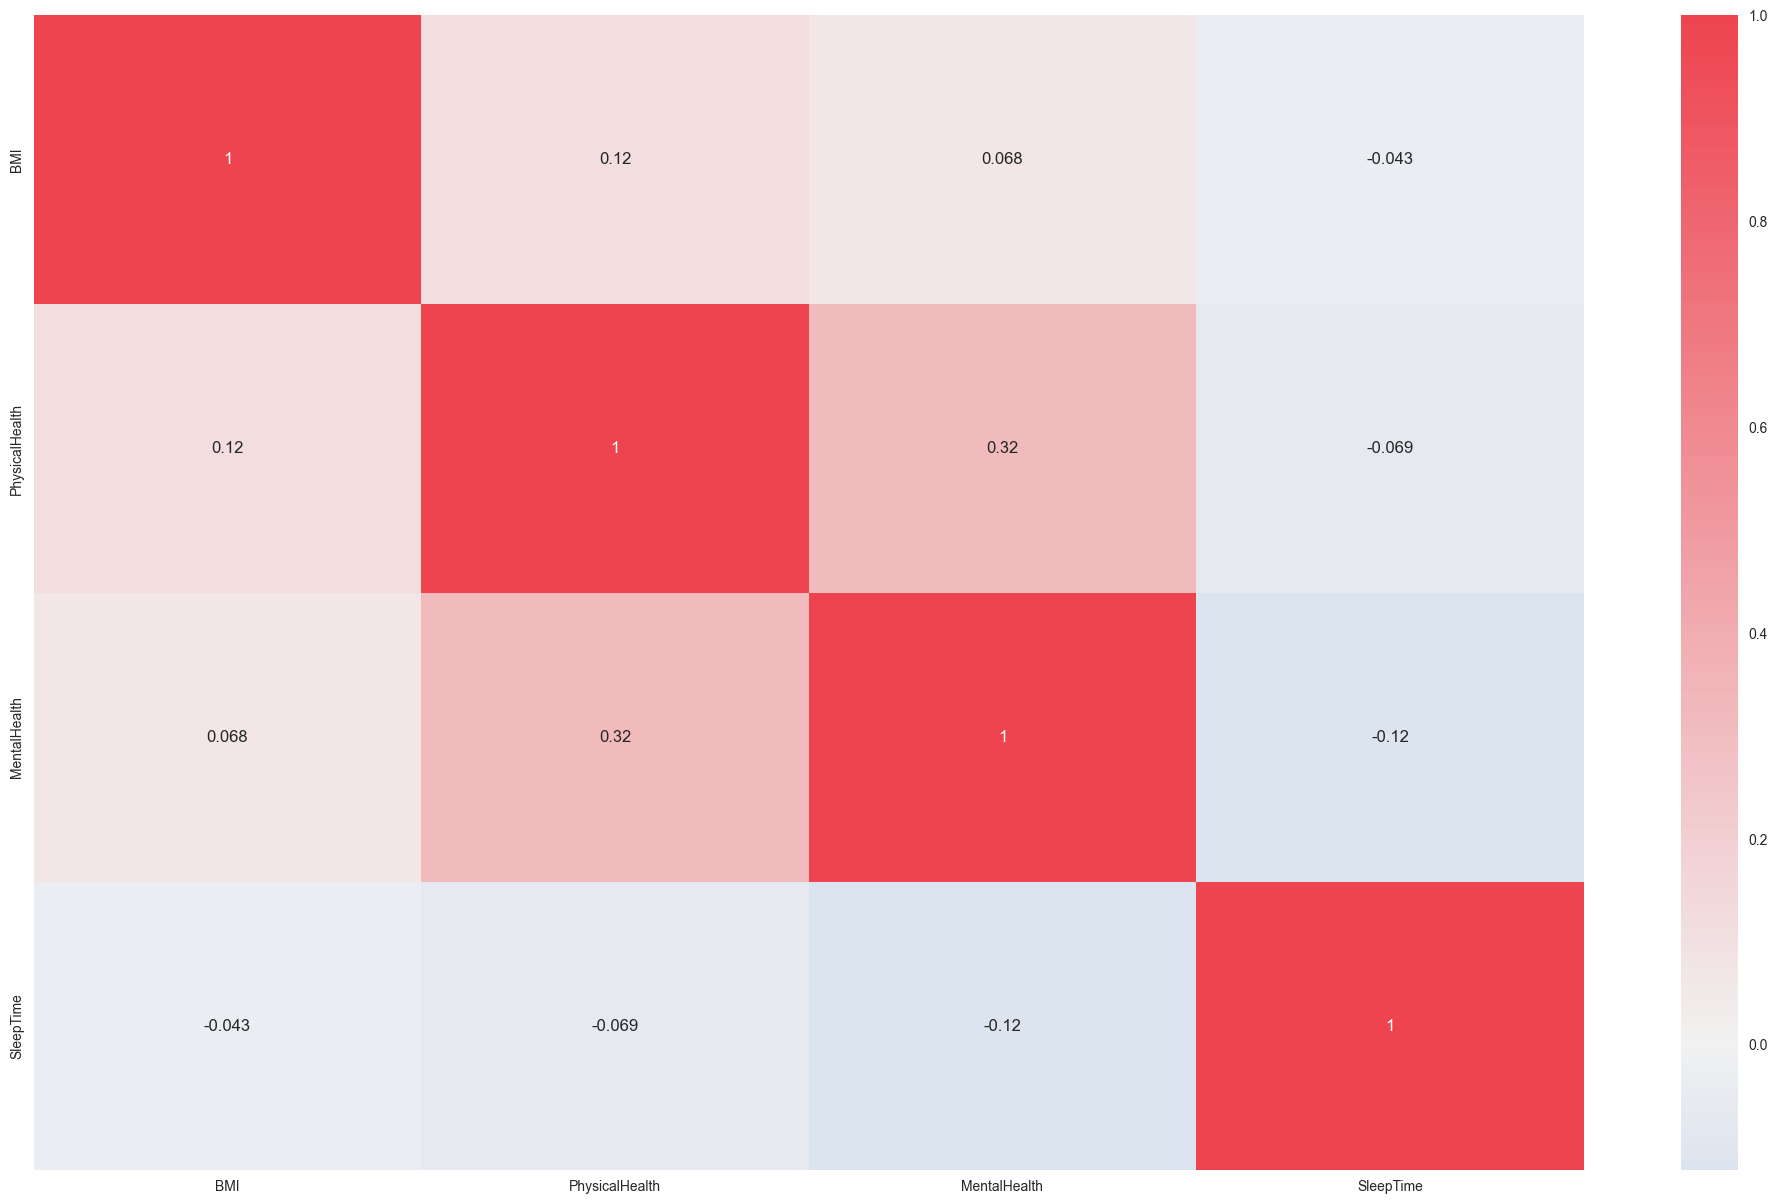

In [33]:
corrmat= X_train.loc[:,['BMI','PhysicalHealth','MentalHealth',
                                           'SleepTime']].corr()
plt.figure(figsize=(25,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

There is no strong correlation between any of the numerical features. Hence, all will be kept.

## 13- Fitting the Models

### 13.1 **KNN** 

In [34]:
#KNN balanced

parameters_k = {"n_neighbors": range(3, 20)}

knn = GridSearchCV(KNeighborsClassifier(), param_grid = parameters_k, verbose=1, cv = 5, n_jobs=-1)
knn.fit(X_train, y_train)

print(f'The best model is: {knn.best_estimator_}')
print('-----------------------------------------------------')

# Testing the model using X_test and storing the output in y_pred1
y_pred1 = knn.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
cm1 = confusion_matrix(y_test, y_pred1)
cr1 = classification_report(y_test, y_pred1)

print(f'Accuracy of optimized KNN is: {accuracy1}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized KNN is:\n {cm1}')
print('-----------------------------------------------------')
print(f'Classification report of optimized KNN is:\n {cr1}')

Fitting 5 folds for each of 17 candidates, totalling 85 fits
The best model is: KNeighborsClassifier(n_neighbors=3)
-----------------------------------------------------
Accuracy of optimized KNN is: 0.9118682973632753
-----------------------------------------------------
Confusion matrix of optimized KNN is:
 [[68128 14209]
 [  304 82033]]
-----------------------------------------------------
Classification report of optimized KNN is:
               precision    recall  f1-score   support

           0       1.00      0.83      0.90     82337
           1       0.85      1.00      0.92     82337

    accuracy                           0.91    164674
   macro avg       0.92      0.91      0.91    164674
weighted avg       0.92      0.91      0.91    164674



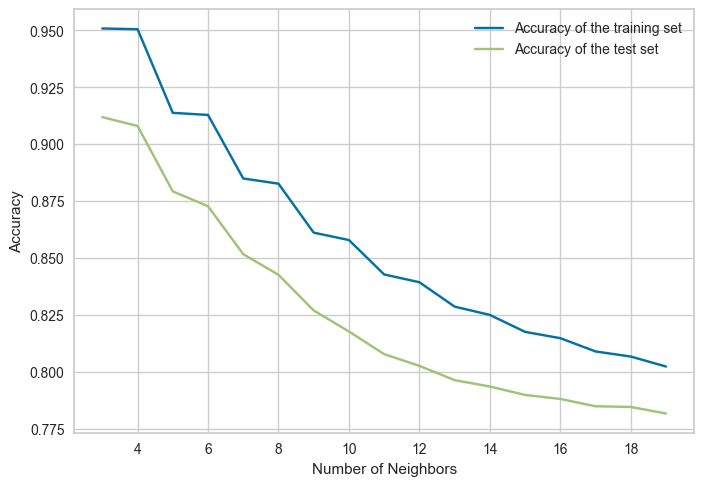

In [35]:
#Plotting the training and testing accuracy of the optimized balanced model:

knntraining_accuracy = []
knntest_accuracy = []

neighbors_setting = range(3,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    knntraining_accuracy.append(knn.score(X_train, y_train))
    knntest_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,knntraining_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,knntest_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
#by looking at plot, best result accurs when n_neighbors is 1, but to avoid overfitting,
#I decided to choose the range to start from k = 3. The highest accuracy for training and testing occur when k is lower than 10.

In [36]:
accuracy = accuracy_score(y_test, y_pred1)
print('KNN Accuracy:', accuracy)

precision = precision_score(y_test, y_pred1)
print('KNN Precision:', precision)

recall = recall_score(y_test, y_pred1)
print('KNN Recall:', recall)

f1 = f1_score(y_test, y_pred1)
print('KNN F1 Score:', f1)

kappa = cohen_kappa_score(y_test, y_pred1)
print('KNN Cohens kappa:', kappa)

y_pred_proba = knn.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print('KNN Area Under Curve:', auc)

cm = confusion_matrix(y_test, y_pred1)
print('KNN Confusion Matrix:\n', cm)

KNN Accuracy: 0.9118682973632753
KNN Precision: 0.8523617547432514
KNN Recall: 0.9963078567351251
KNN F1 Score: 0.9187306458206173
KNN Cohens kappa: 0.8237365947265507
KNN Area Under Curve: 0.864265045692695
KNN Confusion Matrix:
 [[68128 14209]
 [  304 82033]]


### 13.2 **Decision Tree** 

In [38]:
# Decision Tree model with optimization using GridSearch

params = {'max_depth': list(range(50, 70)),
          'criterion': ('gini', 'entropy'),
         'max_leaf_nodes': list(range(79995, 80005))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

grid_search_cv.best_estimator_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


DecisionTreeClassifier(max_depth=69, max_leaf_nodes=79997)

In [39]:
DT = DecisionTreeClassifier(max_depth=57,max_leaf_nodes=800002,max_features="auto",
                            random_state=0)
DT.fit(X_train,y_train)
print(DT.score(X_train, y_train))
DT.score(X_test, y_test)

0.9979700081720184


0.9497856370768913

In [40]:
# Testing the model using X_test and storing the output in y_pred3b
y_pred2 = DT.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
cm2 = confusion_matrix(y_test, y_pred2)
cr2 = classification_report(y_test, y_pred2)

print(f'Accuracy of optimized DT is: {accuracy2}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized DT is:\n {cm2}')
print('-----------------------------------------------------')
print(f'Classification report of optimized DT is:\n {cr2}')

Accuracy of optimized DT is: 0.9497856370768913
-----------------------------------------------------
Confusion matrix of optimized DT is:
 [[74105  8232]
 [   37 82300]]
-----------------------------------------------------
Classification report of optimized DT is:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     82337
           1       0.91      1.00      0.95     82337

    accuracy                           0.95    164674
   macro avg       0.95      0.95      0.95    164674
weighted avg       0.95      0.95      0.95    164674



In [41]:
DTaccuracy = accuracy_score(y_test, y_pred2)
print('Accuracy:', DTaccuracy)

DTprecision = precision_score(y_test, y_pred2)
print('Precision:', DTprecision)

DTrecall = recall_score(y_test, y_pred2)
print('Recall:', DTrecall)

DTf1 = f1_score(y_test, y_pred2)
print('F1 Score:', DTf1)

DTkappa = cohen_kappa_score(y_test, y_pred2)
print('Cohens kappa:', DTkappa)

DTy_pred_proba1 = DT.predict_proba(X_test)[::,1]
DTauc = roc_auc_score(y_test, DTy_pred_proba1)
print('Area Under Curve:', DTauc)

DTcm = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix:\n', DTcm)

Accuracy: 0.9497856370768913
Precision: 0.9090708257853577
Recall: 0.9995506272999988
F1 Score: 0.952166091086314
Cohens kappa: 0.8995712741537827
Area Under Curve: 0.9501242881731061
Confusion Matrix:
 [[74105  8232]
 [   37 82300]]


### 13.3 **Random Forest** 

In [ ]:
param_grid_RF = {
    'max_depth': list(range(50, 70)),
    'max_features': [5, 10, 20],
    'min_samples_leaf': [79999, 80000],
    'min_samples_split': [100, 300, 600],
    'n_estimators': [100, 200, 300]
}

RF = GridSearchCV(RandomForestClassifier(random_state = 0), param_grid_RF, cv = 3)
RF.fit(X_train, y_train)

In [ ]:
# Testing the model using X_test and storing the output in y_pred3b
y_pred3 = RF.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
cm3 = confusion_matrix(y_test, y_pred3)
cr3 = classification_report(y_test, y_pred3)

print(f'Accuracy of optimized RF is: {accuracy3}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized RF is:\n {cm3}')
print('-----------------------------------------------------')
print(f'Classification report of optimized RF is:\n {cr3}')

In [ ]:
RFaccuracy = accuracy_score(y_test, y_pred3)
print('RF Accuracy:', RFaccuracy)

RFprecision = precision_score(y_test, y_pred3)
print('RF Precision:', RFprecision)

RFrecall = recall_score(y_test, y_pred3)
print('RF Recall:', RFrecall)

RFf1 = f1_score(y_test, y_pred3)
print('RF F1 Score:', RFf1)

RFkappa = cohen_kappa_score(y_test, y_pred3)
print('RF Cohens kappa:', RFkappa)

RFy_pred_proba1 = RF.predict_proba(X_test)[::,1]
RFauc = roc_auc_score(y_test, RFy_pred_proba1)
print('RF Area Under Curve:', RFauc)

RFcm = confusion_matrix(y_test, y_pred3)
print('RF Confusion Matrix:\n', RFcm)

### 13.4  **Random Forest (Manually Optimized)**

In [42]:
RF2 = RandomForestClassifier(criterion="entropy",max_depth=120,
                            max_leaf_nodes=80001, n_estimators = 400,
                             random_state=1)
RF2.fit(X_train, y_train)
y_pred4 = RF2.predict(X_test)

RF2accuracy = accuracy_score(y_test, y_pred4)
RF2cm = confusion_matrix(y_test, y_pred4)
RF2cr = classification_report(y_test, y_pred4)

print(f'Accuracy of manually optimized RF is: {RF2accuracy}')
print('-----------------------------------------------------')
print(f'Confusion matrix of manually optimized RF is:\n {RF2cm}')
print('-----------------------------------------------------')
print(f'Classification report of manually optimized RF is:\n {RF2cr}')

Accuracy of manually optimized RF is: 0.9619612082053026
-----------------------------------------------------
Confusion matrix of manually optimized RF is:
 [[76103  6234]
 [   30 82307]]
-----------------------------------------------------
Classification report of manually optimized RF is:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     82337
           1       0.93      1.00      0.96     82337

    accuracy                           0.96    164674
   macro avg       0.96      0.96      0.96    164674
weighted avg       0.96      0.96      0.96    164674



In [44]:
RF2accuracy = accuracy_score(y_test, y_pred4)
print('Accuracy:', RF2accuracy)

RF2precision = precision_score(y_test, y_pred4)
print('Precision:', RF2precision)

RF2recall = recall_score(y_test, y_pred4)
print('Recall:', RF2recall)

RF2f1 = f1_score(y_test, y_pred4)
print('F1 Score:', RF2f1)

RF2kappa = cohen_kappa_score(y_test, y_pred4)
print('Cohens kappa:', RF2kappa)

RF2y_pred_proba1 = RF2.predict_proba(X_test)[::,1]
RF2auc = roc_auc_score(y_test, RF2y_pred_proba1)
print('Area Under Curve:', RF2auc)

RF2cm = confusion_matrix(y_test, y_pred4)
print('Confusion Matrix:\n', RF2cm)

Accuracy: 0.9619612082053026
Precision: 0.9295919404569635
Recall: 0.9996356437567557
F1 Score: 0.9633422675827198
Cohens kappa: 0.9239224164106052
Area Under Curve: 0.9967173677608351
Confusion Matrix:
 [[76103  6234]
 [   30 82307]]


### ROC AUC Curves

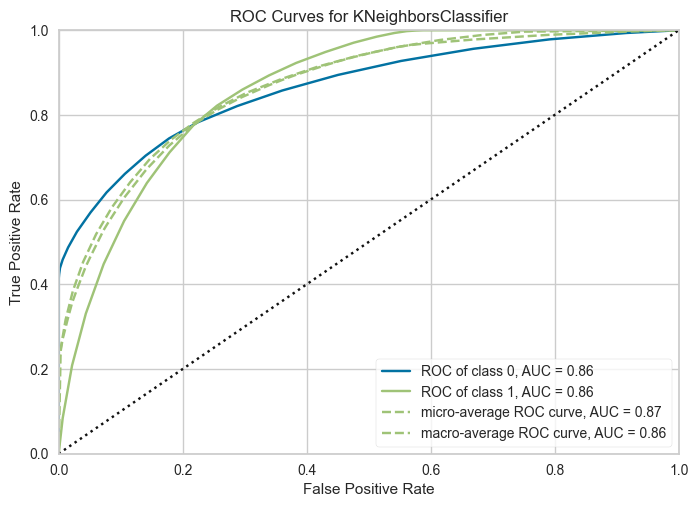

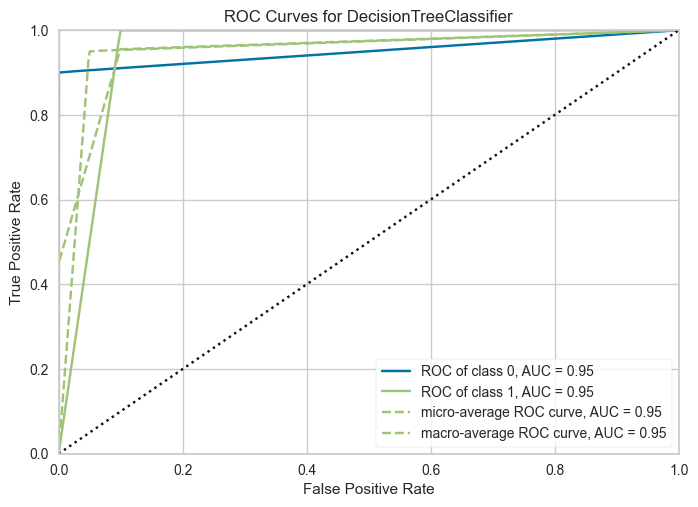

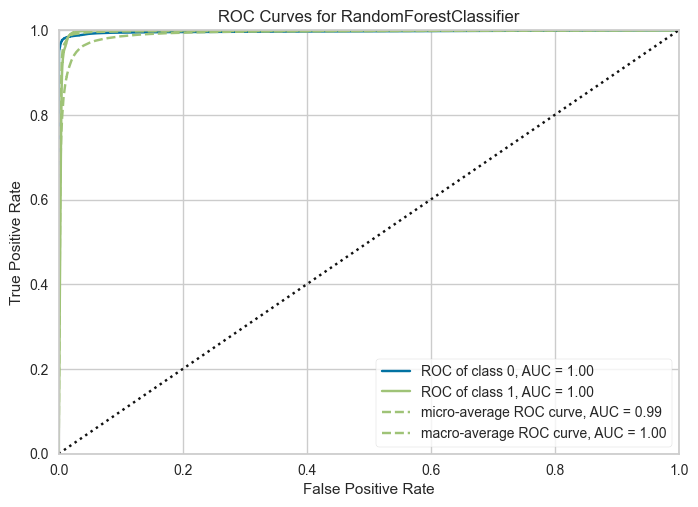

In [46]:
classifiers=[knn, DT, RF2]
classes = [0,1]
names=['KNN', 'DT', 'RF']

def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test) 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)
        
visualization =[ROC_viz()]

### Feature Importance for the Top Two Models

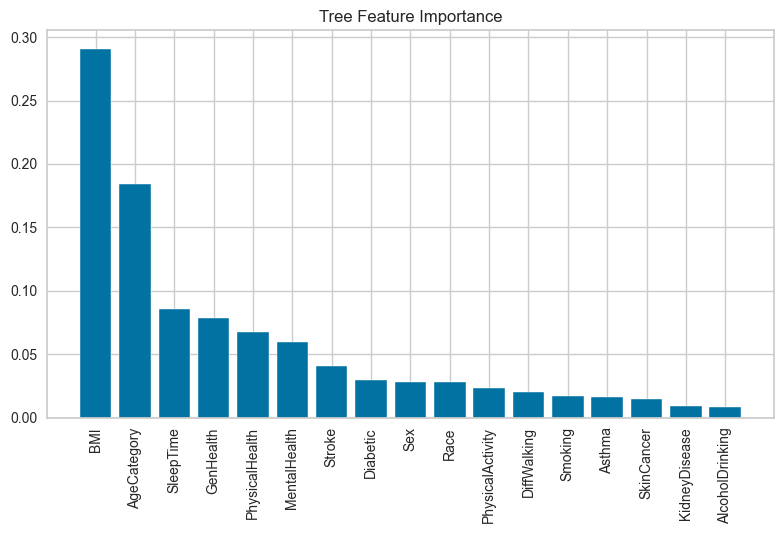

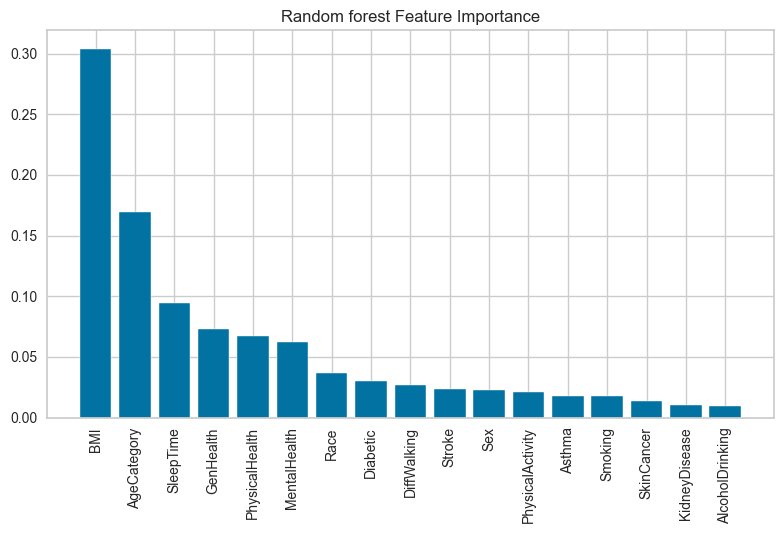

In [50]:
treeimportances = DT.feature_importances_
forestimportances = RF2.feature_importances_
 
plt.title('Tree Feature Importance')
plt.bar(range(X_train.shape[1]), treeimportances[np.argsort(treeimportances)[::-1]], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[np.argsort(treeimportances)[::-1]], rotation=90)
plt.tight_layout()
plt.show()

plt.title('Random forest Feature Importance')
plt.bar(range(X_train.shape[1]), forestimportances[np.argsort(forestimportances)[::-1]], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[np.argsort(forestimportances)[::-1]], rotation=90)
plt.tight_layout()
plt.show()

### Comparing All Models

In [56]:
classifiers=[knn, DT, RF2]

metrics=['ROC AUC','Cohen Kappa','zero_one_loss','hamming_loss',
         'matthews_corrcoef','accuracy','precision', 'recall', 'f1']

Scores_A=pd.DataFrame(index=metrics,columns=['KNN', 'Decision Tree', 'Random Forest'])

for i in range(0,len(classifiers)):
    cls=classifiers[i]
    y_pred=cls.predict(X_test)
    y_pred_proba=cls.predict_proba(X_test)[::,1]
    cm = confusion_matrix(y_test,y_pred)
    scores=[round(roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted'),4),
     round(cohen_kappa_score(y_test,y_pred),4),
     round(zero_one_loss(y_test,y_pred),4),
     round(hamming_loss(y_test,y_pred),4),
     round(matthews_corrcoef(y_test,y_pred),4),
     round(accuracy_score(y_test,y_pred),4),
     round(precision_score(y_test, y_pred, average='weighted'),4),
     round(recall_score(y_test, y_pred,average='weighted'),4),
     round(f1_score(y_test, y_pred, average='weighted'),4)]
    Scores_A.iloc[:,i]=scores

display(Scores_A)

,KNN,Decision Tree,Random Forest
ROC AUC,0.8643,0.9501,0.9967
Cohen Kappa,0.5635,0.8996,0.9239
zero_one_loss,0.2183,0.0502,0.0380
hamming_loss,0.2183,0.0502,0.0380
matthews_corrcoef,0.5705,0.9041,0.9266
accuracy,0.7817,0.9498,0.9620
precision,0.7888,0.9543,0.9646
recall,0.7817,0.9498,0.9620
f1,0.7804,0.9497,0.9619


In [256]:
classifiers=[knn, DT, RF2]

metrics=['ROC AUC','Cohen Kappa','Accuracy','Precision', 'Recall', 'F1']

Scores_A=pd.DataFrame(index=metrics,columns=['KNN', 'Decision Tree', 'Random Forest'])

for i in range(0,len(classifiers)):
    cls=classifiers[i]
    y_pred=cls.predict(X_test)
    y_pred_proba=cls.predict_proba(X_test)[::,1]
    cm = confusion_matrix(y_test,y_pred)
    scores=[round(roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted'),4),
     round(cohen_kappa_score(y_test,y_pred),4),
     round(accuracy_score(y_test,y_pred),4),
     round(precision_score(y_test, y_pred, average='weighted'),4),
     round(recall_score(y_test, y_pred,average='weighted'),4),
     round(f1_score(y_test, y_pred, average='weighted'),4)]
    Scores_A.iloc[:,i]=scores

display(Scores_A)

,KNN,Decision Tree,Random Forest
ROC AUC,0.8643,0.9501,0.9967
Cohen Kappa,0.5635,0.8996,0.9239
Accuracy,0.7817,0.9498,0.9620
Precision,0.7888,0.9543,0.9646
Recall,0.7817,0.9498,0.9620
F1,0.7804,0.9497,0.9619


Text(70.72222222222221, 0.5, 'Actual')

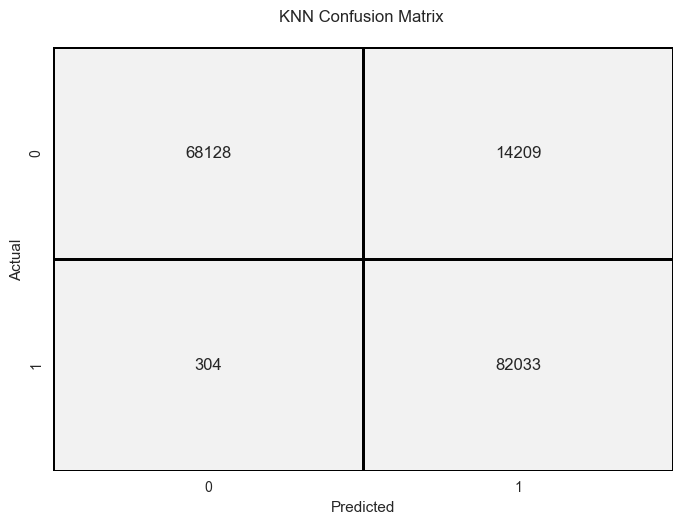

In [251]:
knn_cmplot = sns.heatmap(cm1, annot=True,fmt='2d', cmap="Pastel1", vmin = -100,
            vmax = 10, cbar = False, linewidths = 0.8, linecolor = "black")

plt.title("KNN Confusion Matrix \n")
knn_cmplot.set_xlabel('Predicted')
knn_cmplot.set_ylabel('Actual')

Text(70.72222222222221, 0.5, 'Actual')

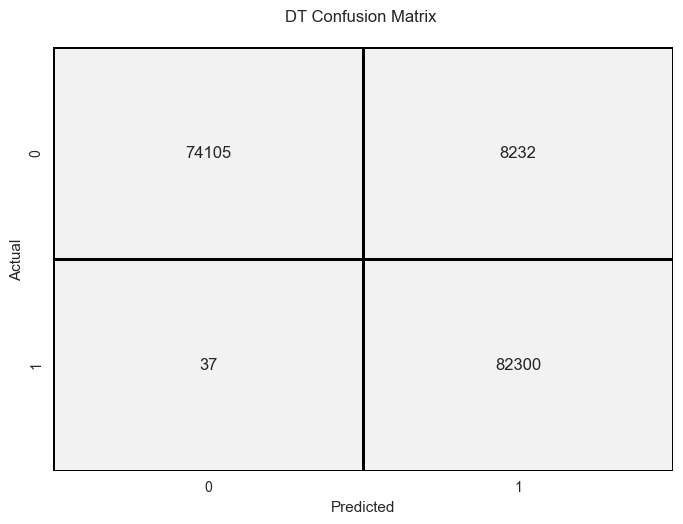

In [253]:
DT_cmplot = sns.heatmap(DTcm, annot=True,fmt='2d', cmap="Pastel1", vmin = -100,
            vmax = 10, cbar = False, linewidths = 0.8, linecolor = "black")

plt.title("DT Confusion Matrix \n")
DT_cmplot.set_xlabel('Predicted')
DT_cmplot.set_ylabel('Actual')

Text(70.72222222222221, 0.5, 'Actual')

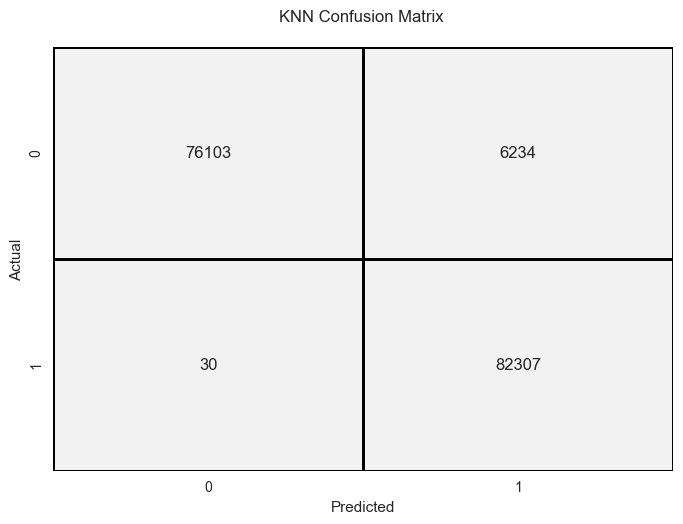

In [254]:
RF_cmplot = sns.heatmap(RF2cm, annot=True,fmt='2d', cmap="Pastel1", vmin = -100,
            vmax = 10, cbar = False, linewidths = 0.8, linecolor = "black")

plt.title("KNN Confusion Matrix \n")
RF_cmplot.set_xlabel('Predicted')
RF_cmplot.set_ylabel('Actual')